# #3. Brushing 

In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib import patches

import ipywidgets as widgets

In [2]:
'''Read in the data'''
dt = {'names':("l-sepal", "w-sepal", "l-petal", "w-petal", "flower"), \
      'formats':('float32','float32','float32','float32','S20')}
data = pd.read_table("iris.data", sep=",", header=None)
data.columns = ("Sepal Length", "Sepal Width", "Petal Length", "Petal Width", "flower")


In [3]:
'''Set the color scheme based on flower name'''
temp = ['r', 'b', 'g']
cscheme = {}
counter = 0
for foo in data['flower'].unique():
    cscheme[str(foo)]=temp[counter]
    counter +=1


<IPython.core.display.Javascript object>


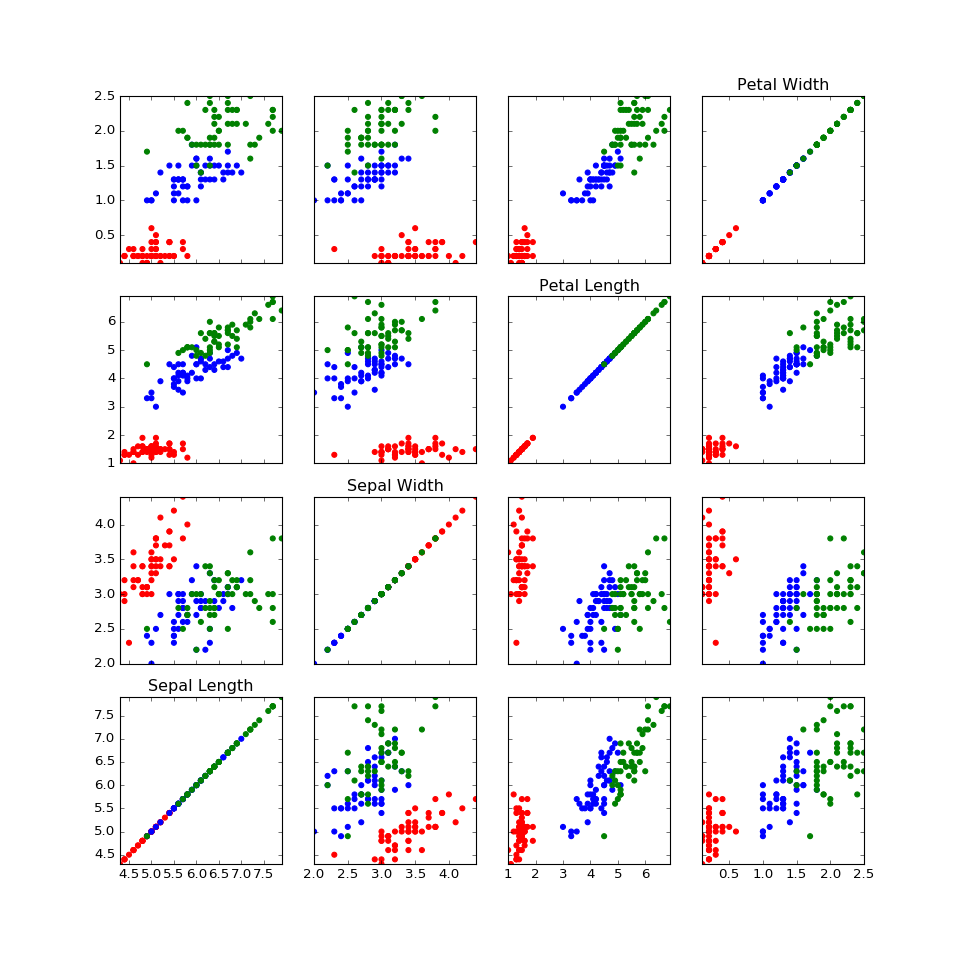

In [4]:
'''Make the scatter plot'''
fig, axar = plt.subplots(4, 4, sharex = "col", sharey = "row", figsize = (12,12))
for foo in range(4):
    for boo in range(4):
        axar[3 -boo, foo].scatter(data[data.columns[foo]], data[data.columns[boo]], \
                                   color=[ cscheme[i] for i in data['flower']])
for foo in range(4):
    axar[3-foo, foo].set_title(data.columns[foo])
    axar[3-foo, foo].set_xlim(data[data.columns[foo]].min(), data[data.columns[foo]].max())
    axar[3-foo, foo].set_ylim(data[data.columns[foo]].min(), data[data.columns[foo]].max())
    


<IPython.core.display.Javascript object>


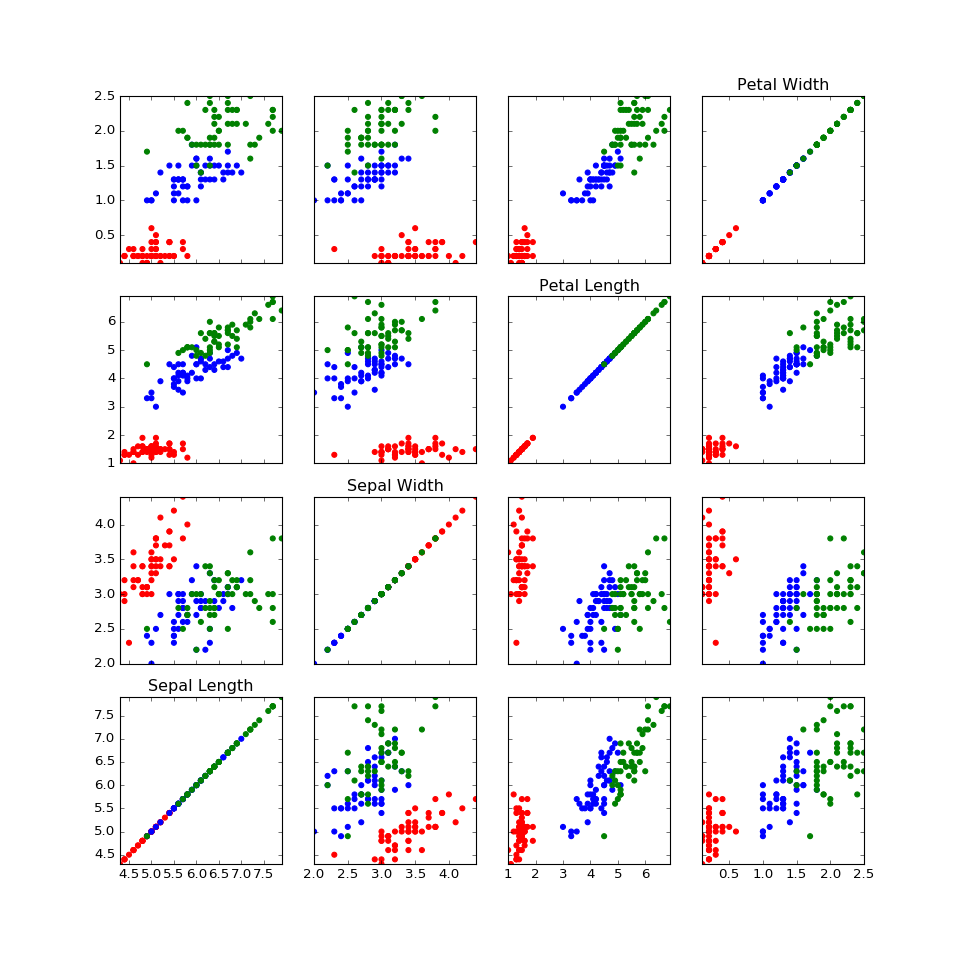

In [5]:
'''Make the scatter plot'''
fig, axar = plt.subplots(4, 4, sharex = "col", sharey = "row", figsize = (12,12))
scatters= []
for foo in range(4):
    for boo in range(4):
        scatters.append(axar[3 -boo, foo].scatter(data[data.columns[foo]], data[data.columns[boo]], \
                                   color=[ cscheme[i] for i in data['flower']]))
for foo in range(4):
    axar[3-foo, foo].set_title(data.columns[foo])
    axar[3-foo, foo].set_xlim(data[data.columns[foo]].min(), data[data.columns[foo]].max())
    axar[3-foo, foo].set_ylim(data[data.columns[foo]].min(), data[data.columns[foo]].max())
    

class Brushing():
    
    def __init__(self, fig, ax, data, scatters):
        self.fig = fig
        self.ax = ax
        self.mouse_press = 0
        self.x1 = None
        self.y1 = None
        self.x2 = None
        self.x2 = None
        self.patch = None
        self.data = data
        self.scatters = scatters
        
    def connect(self): 
        fig.canvas.mpl_connect("button_press_event", self.button_press_callback)
        fig.canvas.mpl_connect("button_release_event", self.button_release_callback)
        fig.canvas.mpl_connect("key_press_event", self.key_press_callback)
        

    def button_press_callback(self, event):
        if self.mouse_press == 1:return
        else:
            self.x1 = event.xdata
            self.y1 = event.ydata
        
    def button_release_callback(self, event):
        if self.mouse_press == 1:return
        else:
            self.x2 = event.xdata
            self.y2 = event.ydata            
            x = np.array([self.x1, self.x2])
            x.sort()
            y = np.array([self.y1, self.y2])
            y.sort()
            for foo in range(self.ax.shape[0]):
                for boo in range(self.ax.shape[1]):
                    if self.ax[3- boo, foo] == event.inaxes:
                        xdata = self.data[self.data.columns[foo]]
                        ydata = self.data[self.data.columns[boo]]
                        indicesx = self.out_range(xdata, x[0], x[1])
                        indicesy = self.out_range(ydata, y[0], y[1])
                        indices = list(set(indicesx) | set(indicesy))
                        self.ax[3 -boo, foo].scatter(data[data.columns[foo]][indices], data[data.columns[boo]][indices], \
                                   color="gray")
                        shade = patches.Rectangle((x[0], y[0]),x[1] - x[0],y[1] - y[0], alpha = 0.2, color = "yellow", lw=0)
                        self.ax[3 - boo, foo].add_patch(shade)
#                             self.ax[foo, boo].add_patch(shade)
# #                     self.ax[foo, boo].clear()
# #                     if self.ax[foo, boo] == event.inaxes:
#                     xlim = self.ax[foo, boo].get_xlim()
#                     ylim = self.ax[foo, boo].get_ylim()
#                     xvals = [xlim[0], x[0], x[1], xlim[1]]
#                     yvals = [ylim[0], y[0], y[1], ylim[1]]
#                     for i in range(3):
#                         for j in range(3):
#                             w = xvals[i + 1] - xvals[i]
#                             h = yvals[j + 1] - yvals[j]
#                             shade = patches.Rectangle((xvals[i], yvals[j]),w,h, alpha = 0.9, color = "gray", lw=0)
#                             self.ax[foo, boo].add_patch(shade)
#                     self.ax[foo, boo].patches[4].remove()

#             self.fig.canvas.draw()
#             self.mouse_press = 1

    def key_press_callback(self, event):
#         pass
        if event.key == "d":
            counter = 0 
            for foo in range(4):
                for boo in range(4):
                    scatters[counter].remove()
                    counter += 1
            counter = 0
            for foo in range(4):
                for boo in range(4):
                    scatters[counter]= self.ax[3 -boo, foo].scatter(data[data.columns[foo]], data[data.columns[boo]], \
                                       color=[ cscheme[i] for i in data['flower']])
                    counter += 1
#             for foo in range(4):
#                 axar[3-foo, foo].set_title(data.columns[foo])
#                 axar[3-foo, foo].set_xlim(data[data.columns[foo]].min(), data[data.columns[foo]].max())
#                 axar[3-foo, foo].set_ylim(data[data.columns[foo]].min(), data[data.columns[foo]].max())


            self.mouse_press = 0

    def out_range(self, datum, low, high):
        '''Return index values where data is not in between low and high'''
        temp = datum[datum > low]
        temp2 = temp[temp < high]
        indices = list(set(datum.index) - set(temp2.keys()))
        return indices


iris_brush = Brushing(fig, axar, data, scatters)
iris_brush.connect()


<IPython.core.display.Javascript object>


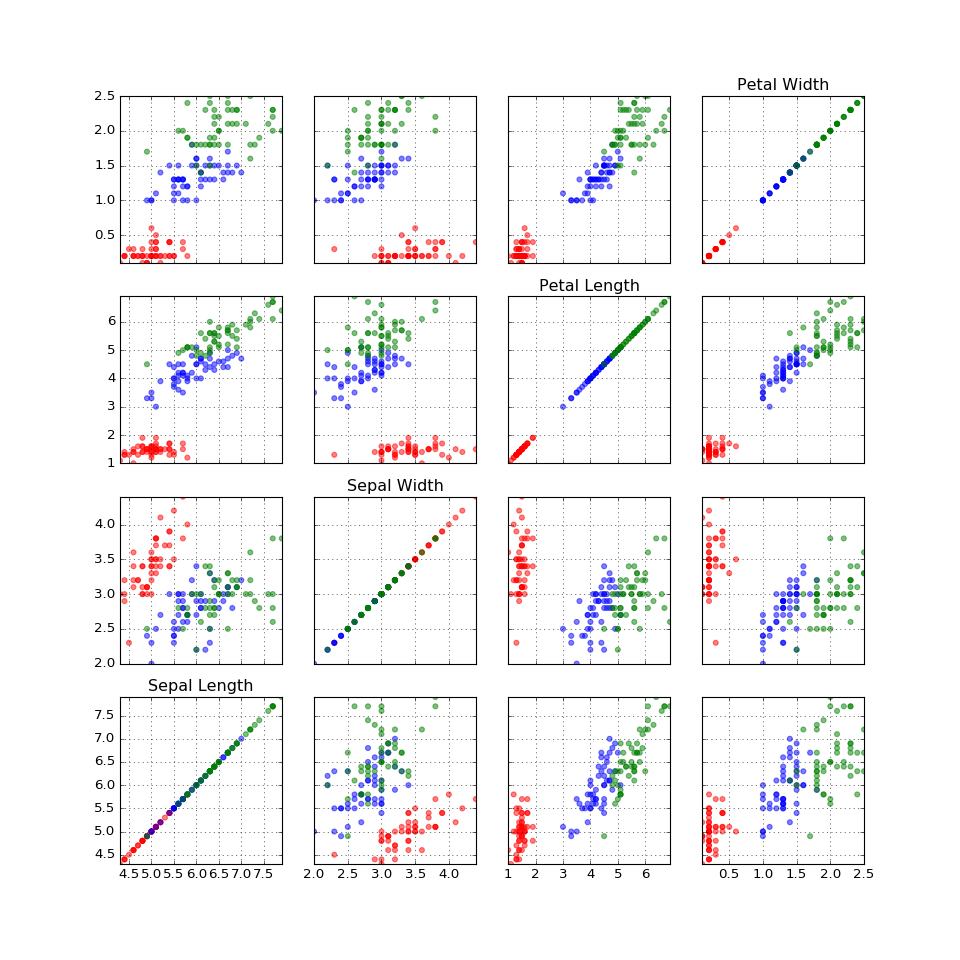

In [6]:
'''Make the scatter plot'''
fig, axar = plt.subplots(4, 4, sharex = "col", sharey = "row", figsize = (12,12))
scatters= np.empty_like(axar)
for foo in range(4):
    for boo in range(4):
        scatters[3- boo, foo] =axar[3 -boo, foo].scatter(data[data.columns[foo]], data[data.columns[boo]], \
                                   color=[ cscheme[i] for i in data['flower']], alpha = 0.5)
        axar[foo, boo].grid(True)
for foo in range(4):
    axar[3-foo, foo].set_title(data.columns[foo])
    axar[3-foo, foo].set_xlim(data[data.columns[foo]].min(), data[data.columns[foo]].max())
    axar[3-foo, foo].set_ylim(data[data.columns[foo]].min(), data[data.columns[foo]].max())
    

class Brushing():
    
    def __init__(self, fig, ax, data, scatters):
        self.fig = fig
        self.ax = ax
        self.mouse_press = 0
        self.x1 = None
        self.y1 = None
        self.x2 = None
        self.y2 = None
        self.patch = None
        self.data = data
        self.scatters = scatters
        self.scatters_brush = np.empty_like(scatters)
        
    def connect(self): 
        fig.canvas.mpl_connect("button_press_event", self.button_press_callback)
        fig.canvas.mpl_connect("button_release_event", self.button_release_callback)
        fig.canvas.mpl_connect("key_press_event", self.key_press_callback)
        

    def button_press_callback(self, event):
        if self.mouse_press == 1:return
        else:
            self.x1 = event.xdata
            self.y1 = event.ydata
        
    def button_release_callback(self, event):
        if self.mouse_press == 1:return
        else:
            self.x2 = event.xdata
            self.y2 = event.ydata            
            #Sort xdata, ydata because mouse-dragged rectangle can be drawn in any direction
            x = np.array([self.x1, self.x2])
            x.sort()
            y = np.array([self.y1, self.y2])
            y.sort()
            #Find the axes and corresponding columns of data used. Find the corresponding rows in data-table
            for foo in range(self.ax.shape[0]):
                for boo in range(self.ax.shape[1]):
                    if self.ax[3- boo, foo] == event.inaxes:
                        xdata = self.data[self.data.columns[foo]]
                        ydata = self.data[self.data.columns[boo]]
                        indicesx = self.out_range(xdata, x[0], x[1])
                        indicesy = self.out_range(ydata, y[0], y[1])
                        indiceout = list(set(indicesx) | set(indicesy))
            self.brush(indiceout)
            self.mouse_press = 1

            
    def brush(self, indiceout):
        '''2 step brushing: remove all points and re'''
        indicein = list(set(self.data.index) - set(indiceout))
        for foo in range(self.ax.shape[0]):
            for boo in range(self.ax.shape[1]):
                self.scatters[3- boo, foo].remove()
                self.scatters_brush[3- boo, foo] = \
                    self.ax[3 -boo, foo].scatter(data[data.columns[foo]][indiceout], \
                                                 data[data.columns[boo]][indiceout], \
                                   color="gray", alpha = 0.5)
                self.scatters[3- boo, foo] = \
                    self.ax[3 -boo, foo].scatter(data[data.columns[foo]][indicein], \
                                                 data[data.columns[boo]][indicein], \
                                   color=[ cscheme[i] for i in data['flower'][indicein]], alpha = 0.5)


    def key_press_callback(self, event):
        if event.key == "d":
            for foo in range(4):
                for boo in range(4):
                    self.scatters_brush[3- boo, foo].remove()
                    self.scatters[3- boo, foo].remove()
                    self.scatters[3- boo, foo]= self.ax[3 -boo, foo].scatter(self.data[self.data.columns[foo]], \
                                                                         self.data[self.data.columns[boo]], \
                                       color=[ cscheme[i] for i in self.data['flower']], alpha = 0.5)

            self.mouse_press = 0

    def out_range(self, datum, low, high):
        '''Return index values where data is not in between low and high'''
        temp = datum[datum > low]
        temp2 = temp[temp < high]
        indices = list(set(datum.index) - set(temp2.keys()))
        return indices


iris_brush = Brushing(fig, axar, data, scatters)
iris_brush.connect()


In [115]:
scatters[0,0]

In [105]:
def out_range(datum, low, high):
    '''Return index values where data is not in between low and high'''
    temp = datum[datum > low]
    temp2 = temp[temp < high]
    indices = list(set(datum.index) - set(temp2.keys()))
    return list(temp2.keys()), indices

t1, t2 = out_range(data["Sepal Length"], 5.5, 6.5)
print(t1)
print(t2)


[14, 15, 18, 51, 55, 56, 61, 62, 63, 64, 66, 67, 68, 69, 70, 71, 72, 73, 74, 78, 79, 82, 83, 85, 87, 88, 91, 92, 94, 95, 96, 97, 99, 100, 101, 103, 111, 113, 114, 115, 119, 121, 123, 126, 127, 128, 132, 133, 134, 136, 137, 138, 142, 146, 148, 149]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 16, 17, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 52, 53, 54, 57, 58, 59, 60, 65, 75, 76, 77, 80, 81, 84, 86, 89, 90, 93, 98, 102, 104, 105, 106, 107, 108, 109, 110, 112, 116, 117, 118, 120, 122, 124, 125, 129, 130, 131, 135, 139, 140, 141, 143, 144, 145, 147]


<IPython.core.display.Javascript object>


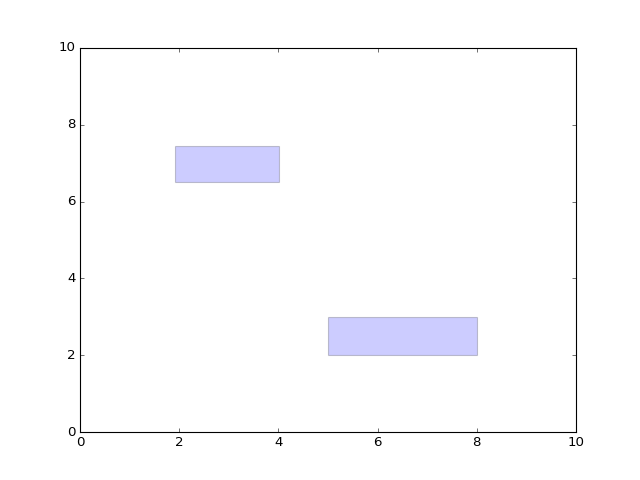

In [149]:
'''Toy example to draw rectangles by mouse and delete them with (d)'''

fig, ax = plt.subplots()
# scatter = ax.scatter(data[data.columns[0]], data[data.columns[1]])
test = patches.Rectangle((5,3), 3,1, alpha = 0.2)
test.set_y(2)
ax.add_patch(test)
ax.set_xlim(0, 10)
ax.set_ylim(0, 10)

class Shade_Area:
    
    def __init__(self, fig, ax):
        self.fig = fig
        self.ax = ax
        self.mouse_press = 0
        self.x1 = None
        self.y1 = None
        self.x2 = None
        self.x2 = None
        self.patch = None
        self.data = data
        
    def connect(self): 
        fig.canvas.mpl_connect("button_press_event", self.button_press_callback)
        fig.canvas.mpl_connect("button_release_event", self.button_release_callback)
        fig.canvas.mpl_connect("key_press_event", self.key_press_callback)
        

    def button_press_callback(self, event):
        if self.mouse_press == 1:return
        else:
            self.x1 = event.xdata
            self.y1 = event.ydata
        
    def button_release_callback(self, event):
        if self.mouse_press == 1:return
        else:
            self.x2 = event.xdata
            self.y2 = event.ydata
        self.patch = patches.Rectangle((self.x1,self.y1), self.x2 - self.x1, self.y2 - self.y1, alpha = 0.2)
        self.ax.add_patch(self.patch)
        self.fig.canvas.draw()
#         self.mouse_press = 1

    def key_press_callback(self, event):
#         pass
        if event.key == "d":
            self.ax.patches[0].remove()
#             self.ax.clear()
#             self.fig.canvas.draw()

temp = Shade_Area(fig, ax)
temp.connect()


<IPython.core.display.Javascript object>


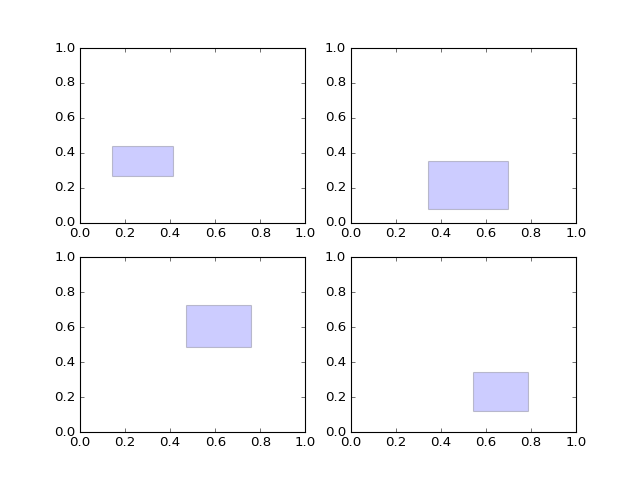

(2, 2)


In [175]:
'''Toy example to draw rectangles by mouse and delete them with (d); for an array  of subplots now'''

fig, ax = plt.subplots(2,2)
# scatter = ax.scatter(data[data.columns[0]], data[data.columns[1]])
# test = patches.Rectangle((5,3), 3,1, alpha = 0.2)
# test.set_y(2)
# ax.add_patch(test)
# ax.set_xlim(0, 10)
# ax.set_ylim(0, 10)

class Shade_Area:
    
    def __init__(self, fig, ax):
        self.fig = fig
        self.ax = ax
        print(self.ax.shape)
        self.mouse_press = 0
        self.x1 = None
        self.y1 = None
        self.x2 = None
        self.x2 = None
        self.patch = None
        
    def connect(self): 
        fig.canvas.mpl_connect("button_press_event", self.button_press_callback)
        fig.canvas.mpl_connect("button_release_event", self.button_release_callback)
        fig.canvas.mpl_connect("key_press_event", self.key_press_callback)
        

    def button_press_callback(self, event):
        if self.mouse_press == 1:return
        else:
            self.x1 = event.xdata
            self.y1 = event.ydata
        
    def button_release_callback(self, event):
        if self.mouse_press == 1:return
        else:
            self.x2 = event.xdata
            self.y2 = event.ydata
        self.patch = patches.Rectangle((self.x1,self.y1), self.x2 - self.x1, self.y2 - self.y1, alpha = 0.2)
#         self.ax.add_patch(self.patch)
        for foo in range(self.ax.shape[0]):
            for boo in range(self.ax.shape[1]):
                if self.ax[foo, boo] == event.inaxes:                
                    self.ax[foo, boo].add_patch(self.patch)

        self.fig.canvas.draw()
#         self.mouse_press = 1

    def key_press_callback(self, event):
        pass
#         if event.key == "d":
#             self.ax.patches[0].remove()
#             self.ax.clear()
#             self.fig.canvas.draw()

temp = Shade_Area(fig, ax)
temp.connect()


<IPython.core.display.Javascript object>


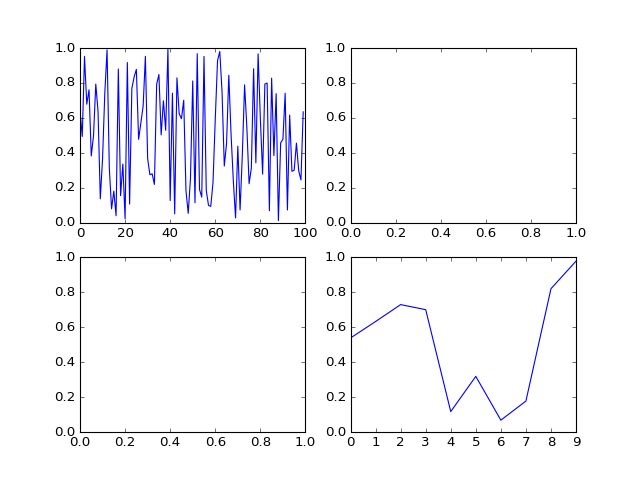

In [178]:
'''Toy example from lecture to identify axes in subplots'''


fig, ax = plt.subplots(2,2)
ax[0,0].plot(np.random.rand(100))
ax[1,1].plot(np.random.rand(10))

w = widgets.HTML()

def onclick(event):
#     w.value = 'button=%d, x=%d, y=%d, xdata=%f, ydata=%f'%(
#               event.button, event.x, event.y, event.xdata, event.ydata)
    for foo in range(2):
        for boo in range(2):
            if ax[foo, boo] ==event.inaxes:
                w.value = 'axes = %d, %d; x=%d, y=%d, xdata=%f, ydata=%f'%\
                (foo, boo, event.x, event.y, event.xdata, event.ydata)

    
cid = fig.canvas.mpl_connect('button_press_event', onclick)
w

<IPython.core.display.Javascript object>


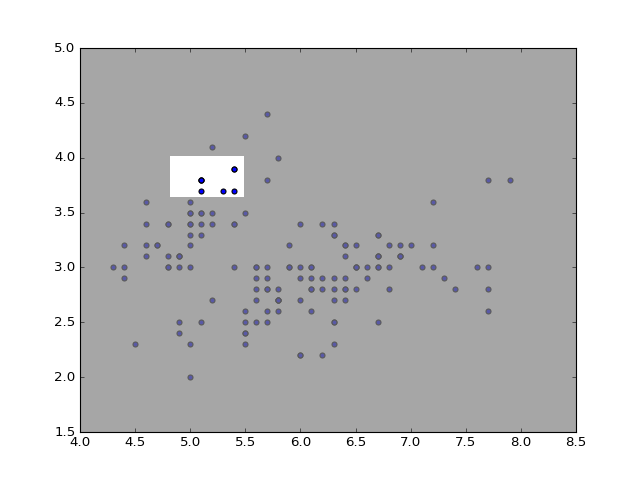

In [177]:
'''Toy example to draw un-highlight the scatter plot outside rectangle drawn by mouse, and reset with (d)'''

fig, ax = plt.subplots()

tempdata = [data[data.columns[0]], data[data.columns[1]]]
scatter = ax.scatter(tempdata[0], tempdata[1])


class Highlight:
    
    def __init__(self, fig, ax, data):
        self.fig = fig
        self.ax = ax
        self.mouse_press = 0
        self.x1 = None
        self.y1 = None
        self.x2 = None
        self.x2 = None
        self.patch = None
        self.data = data
        
    def connect(self): 
        fig.canvas.mpl_connect("button_press_event", self.button_press_callback)
        fig.canvas.mpl_connect("button_release_event", self.button_release_callback)
        fig.canvas.mpl_connect("key_press_event", self.key_press_callback)
        

    def button_press_callback(self, event):
        if self.mouse_press == 1:return
        else:
            self.x1 = event.xdata
            self.y1 = event.ydata
        
    def button_release_callback(self, event):
        if self.mouse_press == 1:return
        else:
            self.x2 = event.xdata
            self.y2 = event.ydata            
            x = np.array([self.x1, self.x2])
            x.sort()
            y = np.array([self.y1, self.y2])
            y.sort()
            xlim = self.ax.get_xlim()
            ylim = self.ax.get_ylim()
            xvals = [xlim[0], x[0], x[1], xlim[1]]
            yvals = [ylim[0], y[0], y[1], ylim[1]]
            for foo in range(3):
                for boo in range(3):
                    w = xvals[foo + 1] - xvals[foo]
                    h = yvals[boo + 1] - yvals[boo]
                    shade = patches.Rectangle((xvals[foo], yvals[boo]),w,h, alpha = 0.7, color = "gray", lw=0)
                    self.ax.add_patch(shade)
            self.ax.patches[4].remove()

            self.fig.canvas.draw()
            self.mouse_press = 1

    def key_press_callback(self, event):
        if event.key == "d":
#             self.ax.patches[0].remove()
            npatch = len(self.ax.patches)
            for foo in range(npatch):
                self.ax.patches[0].remove()
            self.mouse_press = 0


temp = Highlight(fig, ax, tempdata)
temp.connect()
